: Ensure your data is properly preprocessed. Sometimes, data cleaning, normalization, or balancing techniques might improve model performance.

In [ ]:
import pandas as pd

In [ ]:
df= pd.read_csv('processed_tweet_parsed.csv')
df['processed_Text'] = df['processed_Text'].astype(str).apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))
df.head()

,index,id,Annotation,oh_label,processed_Text
0,5.74948705591165E+017,5.74948705591165E+017,none,0.0,@ halalflaws @ biebervalue @ greenlinerzjm rea...
1,5.71917888690393E+017,5.71917888690393E+017,none,0.0,@ ShreyaBafna3 idiots claim people tried stop ...
2,3.90255841338601E+017,3.90255841338601E+017,sexism,1.0,"RT @ Mooseoftorment Call sexist , go auto plac..."
3,5.68208850655916E+017,5.68208850655916E+017,racism,1.0,"@ g0ssipsquirrelx Wrong , ISIS follows example..."
4,5.75596338802373E+017,5.75596338802373E+017,none,0.0,# mkr


In [ ]:
# df.head(151)

In [ ]:
df.columns

Index(['index', 'id', 'Annotation', 'oh_label', 'processed_Text'], dtype='object')

In [ ]:
df = df.drop(labels = ['index', 'id', 'Annotation'], axis=1)

In [ ]:
df.isnull().sum()

oh_label          3
processed_Text    0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

oh_label          0
processed_Text    0
dtype: int64

In [ ]:
# df['Text'] = df['Text'].astype('str')
df['oh_label'] = df['oh_label'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16848 entries, 0 to 16850
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   oh_label        16848 non-null  int64 
 1   processed_Text  16848 non-null  object
dtypes: int64(1), object(1)
memory usage: 394.9+ KB


In [ ]:
df.shape

(16848, 2)

In [ ]:
df['oh_label'].sum()

5347

In [ ]:
df['oh_label'].sum()/ df['oh_label'].count()

0.3173670465337132

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import transformers
from transformers import AutoModel, BertTokenizerFast

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
df2 = pd.read_csv('/content/cyberbullying_processed.csv')
df2.head()

,cyberbullying_type,processed_tweet_text
0,not_cyberbullying,"words # katandandre , food crapilicious ! # mkr"
1,not_cyberbullying,# aussietv white ? # MKR # theblock # ImACeleb...
2,not_cyberbullying,@ XochitlSuckkks classy whore ? red velvet cup...
3,not_cyberbullying,"@ Jason_Gio meh . : P thanks heads , concerned..."
4,not_cyberbullying,@ RudhoeEnglish ISIS account pretending Kurdis...


In [ ]:
# code for new dataset
df2['cyberbullying_type'].unique()
df2['cyberbullying_type'].replace(regex=['religion', 'gender', 'ethnicity', 'other_cyberbullying', 'age'], value='1',inplace = True)
df2['cyberbullying_type'].replace(regex=['not_cyberbullying'], value=0,inplace=True)
df2['cyberbullying_type'] = df2['cyberbullying_type'].astype(int)

In [ ]:
print(df2['cyberbullying_type'].sum()/df2.shape[0])
df2.head(48732)
df2=df2.rename(columns={'processed_tweet_text':'processed_Text', 'cyberbullying_type':'oh_label'})
df2.head()

0.8334102155497778


,oh_label,processed_Text
0,0,"words # katandandre , food crapilicious ! # mkr"
1,0,# aussietv white ? # MKR # theblock # ImACeleb...
2,0,@ XochitlSuckkks classy whore ? red velvet cup...
3,0,"@ Jason_Gio meh . : P thanks heads , concerned..."
4,0,@ RudhoeEnglish ISIS account pretending Kurdis...


In [ ]:
df2["oh_label"][7944]
df2_nb = df2.iloc[0:7945,:]
df2_nb.head(7946)

,oh_label,processed_Text
0,0,"words # katandandre , food crapilicious ! # mkr"
1,0,# aussietv white ? # MKR # theblock # ImACeleb...
2,0,@ XochitlSuckkks classy whore ? red velvet cup...
3,0,"@ Jason_Gio meh . : P thanks heads , concerned..."
4,0,@ RudhoeEnglish ISIS account pretending Kurdis...
...,...,...
7940,0,n't know want wear # ugh
7941,0,Argh another round instant restaurants .... ! ...
7942,0,Teacher sets new charity tackle anti-gay bully...
7943,0,"barely tolerate Kat Andre , Katie Nikki annoyi..."


In [ ]:
df2_b = df2.iloc[7945:,:]
df2_b = df2_b.sample(frac=.63, random_state=42)
df2_b.shape

# df2_nb.head(5)

(25041, 2)

In [ ]:
frames = [df,df2_nb,df2_b]
df1 = pd.concat(frames)
df1.shape

(49834, 2)

In [ ]:
df1 = df1.dropna()
df1.isnull().sum()

oh_label          0
processed_Text    0
dtype: int64

In [ ]:
df1['oh_label'].unique()

array([0, 1])

In [ ]:
df1['oh_label'].sum()/df1['oh_label'].count()

0.6097967210483013

In [ ]:
# to remove stop words
# from nltk.corpus import stopwords
# stopwords.words.english #  to see stop words in english

# def remove_stop_words(text):
#   new_text = []
#   for word in text.split:
#     if word in stopwords.words('english'):
#       new_text.append('')
#     else:
#       new_text.append(word)


#       x = new_text[:]
#       new_text.clear()

#   return ' '.join(x)



In [ ]:
import string
exclude = string.punctuation

def remove_punc(text):
  return text.translate(str.maketrans('','',exclude))

df1['processed_Text'] = df1['processed_Text'].apply(remove_punc)

In [ ]:
import re
def remove_html_lags(text):
  pattern = re.compile('<,*?>')
  return pattern.sub(r'', text)

# df1['processed_type'].apply(remove_html_link)
# df1.head()

In [ ]:
def remove_link(text):
  pattern = re.compile(r'https?://\S+|www\.\S+')
  return pattern.sub(r'',text)

df1['processed_Text'] = df1['processed_Text'].apply(remove_link)

In [ ]:
df1['processed_Text']=df1['processed_Text'].str.lower()

In [ ]:
df1['processed_Text']=df1["processed_Text"].astype(str).apply(lambda x:x.encode('ascii','ignore').decode('ascii'))

In [ ]:
df1.head(15)

,oh_label,processed_Text
0,0,halalflaws biebervalue greenlinerzjm read c...
1,0,shreyabafna3 idiots claim people tried stop b...
2,1,rt mooseoftorment call sexist go auto place ...
3,1,g0ssipsquirrelx wrong isis follows example m...
4,0,mkr
5,0,rt trobinsonnewera http tconkkcbpcheo saudi...
6,1,rt millhouse66 maureenjs nooo sexist women b...
7,0,going make pancakes nt hve strawberries but ...
8,0,rt ahtweet freebsdgirl dare feelings fantas...
9,1,rt newmanzaa s something wrong girl wins way...


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49833 entries, 0 to 36902
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   oh_label        49833 non-null  int64 
 1   processed_Text  49833 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [ ]:
df1.head()
(df1['oh_label'].sum())/(df1['oh_label'].count())

0.6097967210483013

In [ ]:
df1.head()

,oh_label,processed_Text
0,0,halalflaws biebervalue greenlinerzjm read c...
1,0,shreyabafna3 idiots claim people tried stop b...
2,1,rt mooseoftorment call sexist go auto place ...
3,1,g0ssipsquirrelx wrong isis follows example m...
4,0,mkr


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49833 entries, 0 to 36902
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   oh_label        49833 non-null  int64 
 1   processed_Text  49833 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [ ]:
device = torch.device("cuda")

In [ ]:
train_text, temp_text, train_labels, temp_labels = train_test_split(
    df1['processed_Text'], df1['oh_label'], random_state=42,
    test_size=.3, stratify=df1['oh_label'])

val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels, random_state=42, test_size=.5, stratify = temp_labels)


In [ ]:
# import BERT-base pretrained model
bert = AutoModel.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
## Sample run to check tokenization
text = ['I am doing the bert model tutorial, with podcast']
send_id = tokenizer.batch_encode_plus(text, padding=True)
print(send_id)



{'input_ids': [[101, 1045, 2572, 2725, 1996, 14324, 2944, 14924, 4818, 1010, 2007, 16110, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


<Axes: >

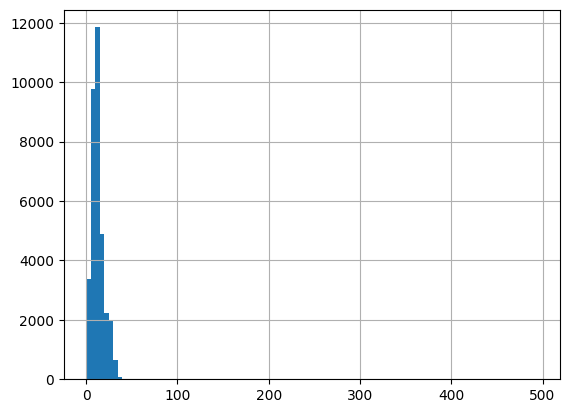

In [ ]:
# tozenization part
seq_len = [len(i.split()) for i in train_text]
pd.Series(seq_len).hist(bins=100)

In [ ]:
ini_array = np.array(seq_len)
unique, frequency = np.unique(ini_array,
                              return_counts = True)
print("Unique Values:",
      unique)

print("Frequency Values:",
      frequency)

Unique Values: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  45  84 113 114 126 133 141 172 211 494]
Frequency Values: [  15  183  686 1160 1343 1620 1769 1979 2102 2293 2445 2440 2614 2306
 2046 1631 1248  887  623  516  429  386  417  479  507  470  458  414
  366  293  196  189  116   79   63   43   15   10   17    5    7    6
    2    1    1    1    1    1    1    1    1    1    1]


In [ ]:
tokens_train = tokenizer.batch_encode_plus(train_text.tolist(),
             max_length= 25, pad_to_max_length= True, truncation=True)

tokens_val = tokenizer.batch_encode_plus(val_text.tolist(),
             max_length= 25, pad_to_max_length= True, truncation=True)

tokens_test = tokenizer.batch_encode_plus(test_text.tolist(),
             max_length= 25, pad_to_max_length= True, truncation=True)



/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2645: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
# converting list to tensor

train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())

val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_labels.tolist())

test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels.tolist())

In [ ]:
train_seq.shape
# train_text.shape

torch.Size([34883, 25])

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

batch_size = 64
train_data = TensorDataset(train_seq, train_mask, train_y)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler = train_sampler, batch_size=batch_size)

val_data = TensorDataset(val_seq, val_mask, val_y)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)


In [ ]:
train_dataloader


In [ ]:
## unfreeze all parameters
for param in bert.parameters():
  param.requires_grad = True

In [ ]:
class BERT_Arch(nn.Module):
    def __init__(self, bert):
        super(BERT_Arch,self).__init__()
        self.bert = bert
        self.dropout = nn.Dropout(0.8)
        self.lerelu = nn.LeakyReLU()
        self.fc1 = nn.Linear(768, 512)
        self.fc2 = nn.Linear(512, 2)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, sent_id, mask):
        # Pass the inputs to the BERT model
        output = self.bert(sent_id, attention_mask=mask)

        # Extract the cls_hs from the output
        cls_hs = output.pooler_output

        # Ensure cls_hs is converted to a tensor if it's not already
        if not isinstance(cls_hs, torch.Tensor):
            cls_hs = torch.tensor(cls_hs)

        # Perform the rest of the forward pass
        x = self.fc1(cls_hs)
        x = self.lerelu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.softmax(x)

        return x




In [ ]:
model = BERT_Arch(bert)

model = model.to(device)

In [ ]:
from transformers import AdamW

optimizer = AdamW(model.parameters(), lr = 1e-5)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
# computing the weights
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(class_weight='balanced',classes= np.unique(train_labels), y= train_labels)

print('Class weight:', class_weights)

Class weight: [1.28142679 0.8199276 ]


In [ ]:
# defining model architecutre
weights = torch.tensor(class_weights, dtype=torch.float)

weights = weights.to(device)
cross_entropy = nn.CrossEntropyLoss(weight=weights)

epochs = 10

In [ ]:
# define the function
def train():
  model.train()
  total_loss, total_accuracy = 0,0
  total_preds = []
  # m = train_dataloader.shape[0]

  for step, batch in enumerate(train_dataloader):
    if step % 50 == 0 and not step==0:
      print('Bactch {:>5,} of {:>5,}.'.format(step, len(train_dataloader)))

    batch = [r.to(device) for r in batch]
      # batch = [r for r in batch]


    sent_id, mask, labels = batch
    model.zero_grad()
    preds = model(sent_id, mask)
    loss = cross_entropy(preds, labels)
    total_loss = total_loss + loss.item()
    loss.backward()
    torch.nn.utils.clip_grad_norm(model.parameters(),1.0)

    optimizer.step()
    preds =preds.detach().cpu().numpy()

    total_preds.append(preds)

  avg_loss = total_loss / len(train_dataloader)
  total_preds = np.concatenate(total_preds,axis=0)
  return avg_loss, total_preds

In [ ]:
# evaluation of model
def evaluation():
  print("\n Evaluating..")

  model.eval()
  total_loss, total_accuracy = 0,0
  total_preds = []
  # m = val_dataloader.shape[0]

  for step, batch in enumerate(val_dataloader):
    if step % 50==0 and not step ==0:

      # elapsed = format_time(time.time()-t0)
      print(' Batch {:>5,} of {:>5,}.'.format(step, len(val_dataloader)))

    batch = [t.to(device) for t in batch]
    # batch = [t for t in batch]

    sent_id, mask, labels = batch

    with torch.no_grad():
      preds = model(sent_id, mask)
      loss = cross_entropy(preds, labels)
      total_loss = total_loss+loss.item()

      preds = preds.detach().cpu().numpy()
      total_preds.append(preds)

    avg_loss = total_loss/len(val_dataloader)
    # total_preds = total_preds.resize((m,1))
    total_preds = total_preds


    return avg_loss, total_preds

In [ ]:
# Fine - tuning loss
best_valid_loss = float('inf')
train_losses=[]
valid_losses=[]

for epoch in range(epochs):
  print('\n Epoch {:}/ {:}'.format(epoch+1, epochs))
  train_loss, _ = train()
  valid_loss, _ = evaluation()

  if valid_loss < best_valid_loss:
    best_valid_loss = valid_loss
    torch.save(model.state_dict(),'saved_weights.pt')
  else:
    break

  train_losses.append(train_loss)
  valid_losses.append(valid_loss)

  print(f'\n Training Loss: {train_loss:.3f}')
  print(f'Validation Loss:{valid_loss:.3f}')



 Epoch 1/ 10


<ipython-input-75-4cb3032c707b>:22: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(),1.0)


Bactch    50 of   546.
Bactch   100 of   546.
Bactch   150 of   546.
Bactch   200 of   546.
Bactch   250 of   546.
Bactch   300 of   546.
Bactch   350 of   546.
Bactch   400 of   546.
Bactch   450 of   546.
Bactch   500 of   546.

 Evaluating..

 Training Loss: 0.226
Validation Loss:0.002

 Epoch 2/ 10
Bactch    50 of   546.
Bactch   100 of   546.
Bactch   150 of   546.
Bactch   200 of   546.
Bactch   250 of   546.
Bactch   300 of   546.
Bactch   350 of   546.
Bactch   400 of   546.
Bactch   450 of   546.
Bactch   500 of   546.

 Evaluating..

 Training Loss: 0.198
Validation Loss:0.002

 Epoch 3/ 10
Bactch    50 of   546.
Bactch   100 of   546.
Bactch   150 of   546.
Bactch   200 of   546.
Bactch   250 of   546.
Bactch   300 of   546.
Bactch   350 of   546.
Bactch   400 of   546.
Bactch   450 of   546.
Bactch   500 of   546.

 Evaluating..


In [ ]:
# get predictions for test data
with torch.no_grad():
  preds = model(test_seq.to(device), test_mask.to(device))
  # preds = model(test_seq, test_mask)
  preds = preds.detach().cpu().numpy()


In [ ]:

# model's performance
preds = np.argmax(preds, axis = 1)
print(classification_report(test_y, preds))
# confusion matrix
pd.crosstab(test_y, preds)

              precision    recall  f1-score   support

           0       0.77      0.89      0.83      2917
           1       0.92      0.83      0.88      4558

    accuracy                           0.86      7475
   macro avg       0.85      0.86      0.85      7475
weighted avg       0.87      0.86      0.86      7475



col_0,0,1
row_0,,
0,2606,311
1,759,3799


In [ ]:
# loss function cross entropy
# dropout